In [42]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np

In [43]:
images_path = "/workspaces/gorillatracker/data_vast/external-datasets/ATRW/atrw_format_adapted" # TODO: change later to .../data_vast/...

images = os.listdir(images_path)
print("Number of images: ", len(images))

Number of images:  1887


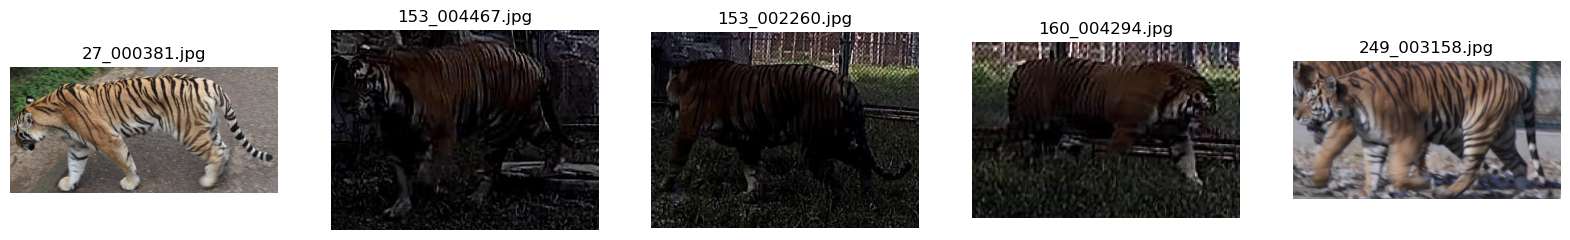

In [44]:
def plot_sample_images(images_path, num_samples=5):
    sample_images = random.sample(images, num_samples)
    plt.figure(figsize=(20, 10))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(images_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(img_name)
        plt.axis("off")
    plt.show()

plot_sample_images(images_path)

In [45]:
def group_images(images):
    labels = {}
    for image in images:
        label = image.split("_")[0]
        if label not in labels:
            labels[label] = []
        labels[label].append(image)
    return labels

labels_dict = group_images(images)
num_individuals = len(labels_dict)
print("Number of Individuals: ", num_individuals)

Number of Individuals:  107


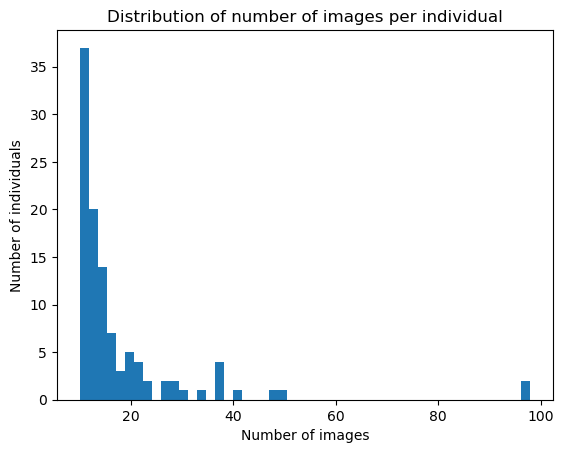

In [46]:
# Plot the distribution of number of images per individual
num_images_per_individual = [len(images) for images in labels_dict.values()]
plt.hist(num_images_per_individual, bins=50)
plt.xlabel("Number of images")
plt.ylabel("Number of individuals")
plt.title("Distribution of number of images per individual")
plt.show()

In [47]:
num_images_stats = {
    "mean": np.mean(num_images_per_individual),
    "median": np.median(num_images_per_individual),
    "std": np.std(num_images_per_individual),
    "min": np.min(num_images_per_individual),
    "max": np.max(num_images_per_individual),
    "25th_percentile": np.percentile(num_images_per_individual, 25),
    "75th_percentile": np.percentile(num_images_per_individual, 75)
}

print("Image Count Statistics per Individual:")
for stat, value in num_images_stats.items():
    print(f"{stat.capitalize()}: {value:.2f}")

Image Count Statistics per Individual:
Mean: 17.64
Median: 13.00
Std: 13.79
Min: 10.00
Max: 98.00
25th_percentile: 11.00
75th_percentile: 18.00


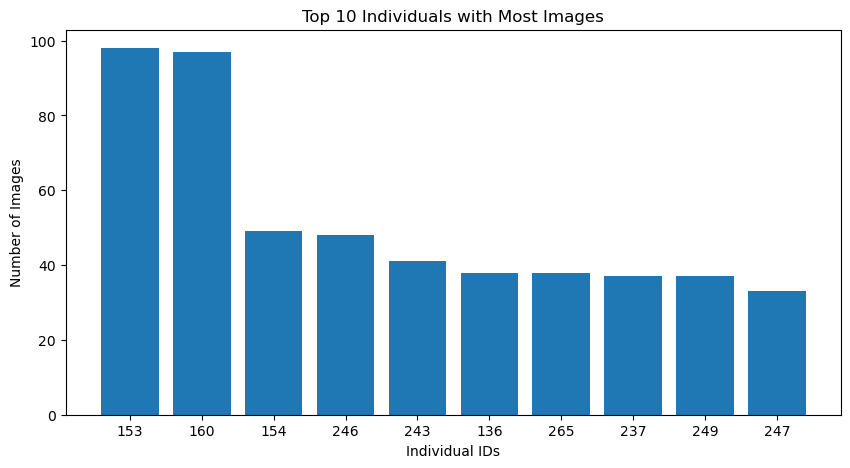

In [48]:
top_n_individuals = 10

label_counts = {label: len(images) for label, images in labels_dict.items()}
top_individuals = sorted(label_counts.items(), key=lambda item: item[1], reverse=True)[:top_n_individuals]
top_labels, top_counts = zip(*top_individuals)

plt.figure(figsize=(10, 5))
plt.bar(top_labels, top_counts)
plt.xlabel("Individual IDs")
plt.ylabel("Number of Images")
plt.title(f"Top {top_n_individuals} Individuals with Most Images")
plt.show()

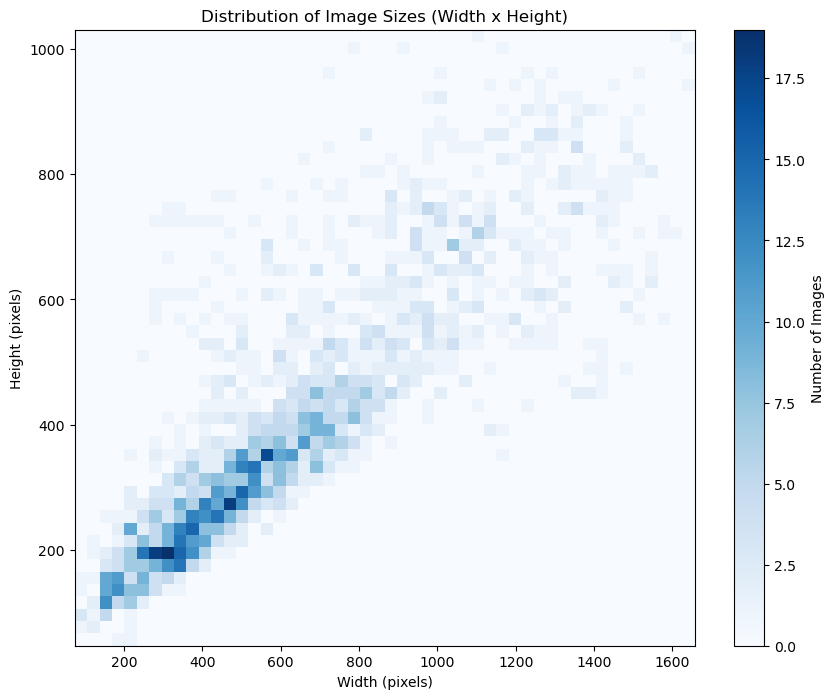

In [49]:
# Collect image sizes
image_sizes = []
for img_name in images:
    img_path = os.path.join(images_path, img_name)
    img = Image.open(img_path)
    image_sizes.append(img.size)

widths, heights = zip(*image_sizes)

plt.figure(figsize=(10, 8))
plt.hist2d(widths, heights, bins=[50, 50], cmap="Blues")
plt.colorbar(label="Number of Images")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.title("Distribution of Image Sizes (Width x Height)")
plt.show()
